# KNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML 101.1-20230219T101028Z-001 (3)/ML 101.1/data/data_banknote_authentication (1).txt")
df

In [ ]:
import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,0:-1]
y=dfnp[:,-1]

#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({0.0: 762, 1.0: 610})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

# inizializziamo il metodo con n_neighbors=5
neigh = KNeighborsClassifier(n_neighbors=5)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict = neigh.predict(X_test)

# e visualizziamo il risultato (solo i primi dieci vini)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 0. 0. 0. 1. 1. 0. 1. 1. 1.]
dati reali presenti nel dataset di test = [0. 0. 0. 0. 1. 1. 0. 1. 1. 1.]


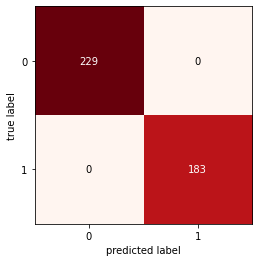

In [ ]:
# visualizziamo la confusion matrix

from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap = plt.cm.Reds)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       229
         1.0       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



# Decision Tree

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML 101.1-20230219T101028Z-001 (3)/ML 101.1/data/data_banknote_authentication (1).txt")
df

,col1,col2,col3,col4,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,0:-1]
y=dfnp[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, 
                                                    test_size =0.33, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

In [ ]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train2,y_train2)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict2 = tree_clf.predict(X_test2)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test2[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 0. 0. 0. 1. 1. 0. 1. 1. 1.]
dati reali presenti nel dataset di test = [0. 0. 1. 1. 0. 1. 1. 0. 1. 1.]


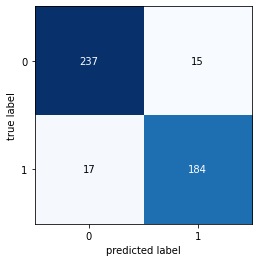

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test2, predict2))
plt.show()

In [ ]:
print(classification_report(y_test2, predict2))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       252
         1.0       0.92      0.92      0.92       201

    accuracy                           0.93       453
   macro avg       0.93      0.93      0.93       453
weighted avg       0.93      0.93      0.93       453



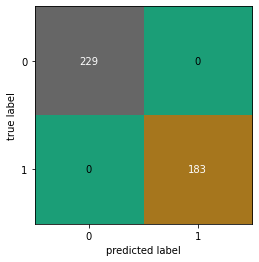

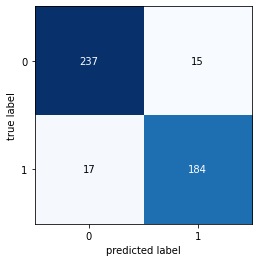

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2) #KNN
plot_confusion_matrix(confusion_matrix(y_test2, predict2)) #Decision Tree

plt.show()

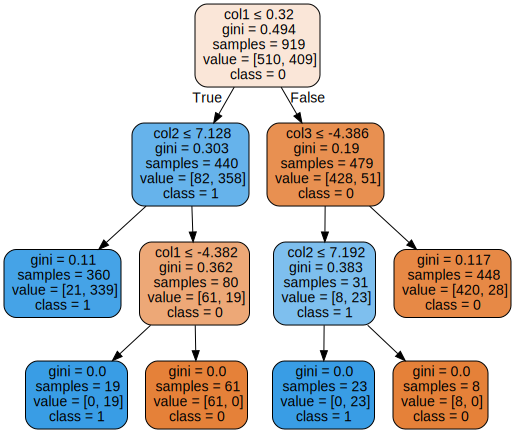

In [ ]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph

In [ ]:
from sklearn.tree import export_text

r = export_text(tree_clf, feature_names=features[0:-1])
print(r)

|--- col1 <= 0.32
|   |--- col2 <= 7.13
|   |   |--- class: 1.0
|   |--- col2 >  7.13
|   |   |--- col1 <= -4.38
|   |   |   |--- class: 1.0
|   |   |--- col1 >  -4.38
|   |   |   |--- class: 0.0
|--- col1 >  0.32
|   |--- col3 <= -4.39
|   |   |--- col2 <= 7.19
|   |   |   |--- class: 1.0
|   |   |--- col2 >  7.19
|   |   |   |--- class: 0.0
|   |--- col3 >  -4.39
|   |   |--- class: 0.0



Dal confronto emerge che entrambi i metodi sono moltro validi, ma in questo caso conviene usare il metodo KNN in quanto ha un a precisione del 100%